In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

#A

In [9]:
def evaluate(param,y=1):
  '''
    evalute function on given points
  '''
  x1 = param[0]
  x2 = param[1]
  return x1*x1 + y*x2*x2 -x1*x2 -x1 - x2

def gradient(param,y=1):
  '''
    evalute gradient on given points
  '''
  x1 = param[0]
  x2 = param[1]
  return (2*x1 - x2 - 1),(2*y*x2 - x1 - 1)

def update(param,step,conver_grad,y=1):
  '''
    update paramters w.r.t gradients 
  '''
  grad1, grad2 = gradient(param,y)
  #print('grad x1 ',grad1,'grad x2 ',grad2)
  param[0] = param[0]  - step * grad1
  param[1] = param[1]  - step * grad2
  
  if grad1 < conver_grad and grad2 < conver_grad:
      return True

def mse (x): 
  '''
    compute  MSE loss
    '''
  return (( x + 1)*(x + 1))**(0.5)


In [21]:
def optim(params,step=0.2,conver_grad=1e-2,iters=20,y=1):
  '''
    perform gradient descent and check if its is converging or not
    '''
  param = list(params)
  func_val = []
  func_val.append( evaluate( param ) )
  conv_point = False

  for i in range(1,iters+1):
    if update(param,step,conver_grad,y) and not(conv_point):
        conv_point =i
    func_val.append( evaluate( param,y ) )



  if conv_point:
    print(f'For iteration - {iters}, step - {step}, convergences - {conver_grad},y - {y} algorithm converge after {int(conv_point)} iterations')
  else:
    print(f'For iteration - {iters}, step - {step}, convergences - {conver_grad},y - {y} algorithm does not converge with required iterations and converegnce value')
  
  if not(conv_point):
     conv_point =  1e10
  
  return func_val,conv_point
    
def plot(liz,c=None):
  if c is None:
    ax = sns.lineplot(x=range(len(liz)),y=liz)
    return ax
  else:
    ax = sns.lineplot(x=liz,y=c)
    return ax

#B

In [11]:
def num_gen(a=-3,b=3):
  '''
    generate two number for evalution purpose 
  '''
  temp = tuple((rnd.randint(a,b),rnd.randint(a,b)))
  print(temp)
  return temp


param = num_gen()

(-1, 3)


In [12]:
#perform gradient descent 
liz,c= optim(param,step=0.1)

For iteration - 20, step - 0.1, convergences - 0.01,y - 1 algorithm converge after 19 iterations


In [13]:
#print value of function at various step of gradient decent 
liz

[11,
 4.879999999999999,
 1.8811999999999998,
 0.41178800000000004,
 -0.30822388000000034,
 -0.6610297011999998,
 -0.8339045535880003,
 -0.9186132312581201,
 -0.9601204833164787,
 -0.9804590368250748,
 -0.9904249280442864,
 -0.9953082147417003,
 -0.9977010252234331,
 -0.9988735023594824,
 -0.9994480161561462,
 -0.9997295279165116,
 -0.9998674686790907,
 -0.9999350596527543,
 -0.9999681792298498,
 -0.9999844078226264,
 -0.999992359833087]

#C

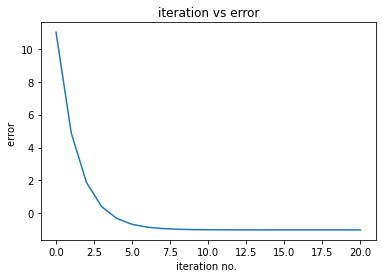

In [14]:
#ploting error vs iterations
ax = plot(liz)
ax.set(xlabel='iteration no. ', ylabel='error ', title ='iteration vs error')
plt.show()

#D

For iteration - 20, step - 1.924, convergences - 0.01,y - 1 algorithm does not converge with required iterations and converegnce value
For iteration - 20, step - 0.432, convergences - 0.01,y - 1 algorithm converge after 7 iterations
For iteration - 20, step - 1.233, convergences - 0.01,y - 1 algorithm does not converge with required iterations and converegnce value
For iteration - 20, step - 0.226, convergences - 0.01,y - 1 algorithm converge after 7 iterations
For iteration - 20, step - 0.844, convergences - 0.01,y - 1 algorithm does not converge with required iterations and converegnce value


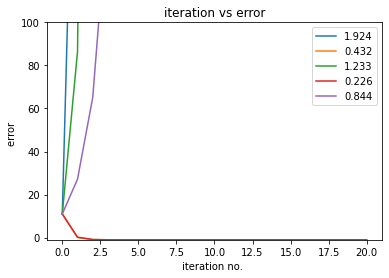

In [19]:
# comparing different value of steps

loops = 5
legend_list = []

for i in range(1,loops+1):
  rands = round(rnd.uniform(0, 2),3)
  liz,c = optim(param,rands)
  legend_list.append(rands)
  ax = plot(liz)

plt.legend(labels = legend_list)
ax.set_ylim(bottom=-1,top=100)
ax.set_alpha(0.5)
ax.set(xlabel='iteration no. ', ylabel='error ', title ='iteration vs error')
plt.show()

For iteration - 20, step - 0.398, convergences - 0.01,y - 1 algorithm converge after 5 iterations
For iteration - 20, step - 0.243, convergences - 0.01,y - 1 algorithm converge after 6 iterations
For iteration - 20, step - 0.872, convergences - 0.01,y - 1 algorithm does not converge with required iterations and converegnce value
For iteration - 20, step - 0.211, convergences - 0.01,y - 1 algorithm converge after 8 iterations
For iteration - 20, step - 0.512, convergences - 0.01,y - 1 algorithm converge after 12 iterations


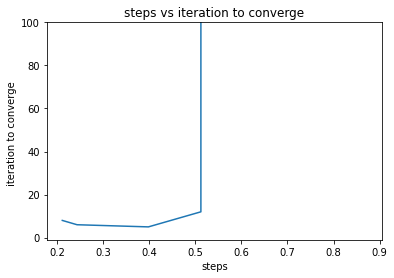

In [39]:
# comparing different value of steps

loops = 5
legend_list = []
cove_point = []

for i in range(1,loops+1):
  rands =round(rnd.uniform(0, 1),3)
  liz,c= optim(param,rands)
  cove_point.append(c)
  legend_list.append(rands)
temp1 =[]
temp2 = []
for i,j in sorted(zip(legend_list,cove_point)):
  temp1.append(i)
  temp2.append(j)
ax = plot(temp1,temp2)

#plt.legend(labels = legend_list)
ax.set_ylim(bottom=-1,top=100)
ax.set_alpha(0.5)
ax.set(xlabel='steps', ylabel='iteration to converge ', title ='steps vs iteration to converge')
plt.show()

#E

For iteration - 20, step - 0.2, convergences - 0.01,y - 0.063 algorithm converge after 2 iterations
For iteration - 20, step - 0.2, convergences - 0.01,y - 0.228 algorithm converge after 3 iterations
For iteration - 20, step - 0.2, convergences - 0.01,y - 0.701 algorithm converge after 6 iterations
For iteration - 20, step - 0.2, convergences - 0.01,y - 0.631 algorithm converge after 6 iterations
For iteration - 20, step - 0.2, convergences - 0.01,y - 0.105 algorithm converge after 2 iterations


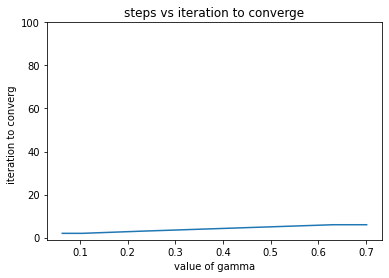

In [41]:
# comparing different value of steps

loops = 5
legend_list = []
cove_point = []

for i in range(1,loops+1):
  rands =round(rnd.uniform(0, 1),3)
  liz,c= optim(param,y=rands)
  cove_point.append(c)
  legend_list.append(rands)
temp1 =[]
temp2 = []
for i,j in sorted(zip(legend_list,cove_point)):
  temp1.append(i)
  temp2.append(j)
ax = plot(temp1,temp2)

#plt.legend(labels = legend_list)
ax.set_ylim(bottom=-1,top=100)
ax.set_alpha(0.5)
ax.set(xlabel='value of gamma', ylabel='iteration to converg  ', title ='steps vs iteration to converge')
plt.show()

#F

For iteration - 20, step - 0.2, convergences - 0.01,y - -1 algorithm converge after 1 iterations


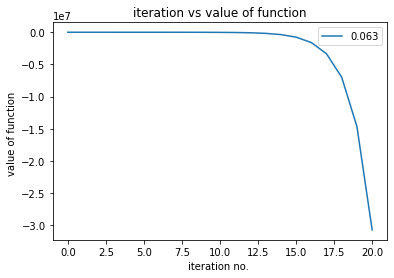

In [45]:
# Analysis y=-1 case
liz,_ = optim(param,y=-1)

ax = plot(liz)
plt.legend(labels = legend_list)
ax.set_alpha(0.5)
ax.set(xlabel='iteration no. ', ylabel='value of function ', title ='iteration vs value of function')
plt.show()

we define D = fxx(a, b) fyy (a, b) – [fxy(a, b)]2 
and D < 0, f has a saddle point (1, 1) which is non convex funtion 
